In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns

In [38]:
# i checked with various techniques in order to treat outliers, but it became even more worst, hence thought of handling outliers
# while modeling (like using other machine learning algorithm which are robust to outliers)
# i'll show how i treated outliers by making the copy of an original dataset

In [2]:
df = pd.read_csv('cleaned_zomato_2.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df.shape

(31549, 10)

In [5]:
df.dtypes

name              object
location          object
online_order      object
book_table        object
cuisines          object
rate             float64
costof2plates    float64
type_mode         object
rest_type         object
votes            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31549 entries, 0 to 31548
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           31547 non-null  object 
 1   location       31522 non-null  object 
 2   online_order   31549 non-null  object 
 3   book_table     31549 non-null  object 
 4   cuisines       31549 non-null  object 
 5   rate           31549 non-null  float64
 6   costof2plates  31549 non-null  float64
 7   type_mode      31549 non-null  object 
 8   rest_type      31400 non-null  object 
 9   votes          31549 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.4+ MB


In [7]:
df.isnull().sum()

name               2
location          27
online_order       0
book_table         0
cuisines           0
rate               0
costof2plates      0
type_mode          0
rest_type        149
votes              0
dtype: int64

In [8]:
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])

In [9]:
# df['name'] = df.dropna(df['name']) TypeError: 'Series' objects are mutable, thus they cannot be hashed
# pd.crosstab(df.cuisines,[df.rate,df.location], margins = all)

In [10]:
df.dropna(subset=['name'], inplace=True)

In [11]:
df.isnull().sum()

name             0
location         0
online_order     0
book_table       0
cuisines         0
rate             0
costof2plates    0
type_mode        0
rest_type        0
votes            0
dtype: int64

In [12]:
df.dtypes

name              object
location          object
online_order      object
book_table        object
cuisines          object
rate             float64
costof2plates    float64
type_mode         object
rest_type         object
votes            float64
dtype: object

In [13]:
numerical = [x for x in df.columns if df[x].dtype in ['int64', 'float64']]
numerical

['rate', 'costof2plates', 'votes']

In [14]:
categorical = [x for x in df.columns if df[x].dtype not in ['int64', 'float64']]
categorical

['name',
 'location',
 'online_order',
 'book_table',
 'cuisines',
 'type_mode',
 'rest_type']

In [15]:
len(df.columns)

10

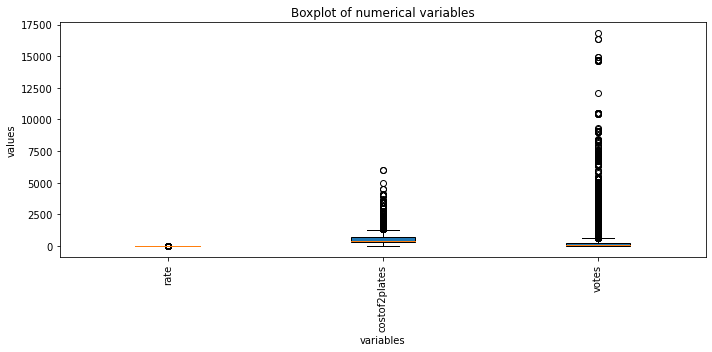

In [16]:
plt.figure(figsize=(10,5))
plt.boxplot(df[numerical].values, vert = True, patch_artist = True)

plt.xticks(range(1, len(df[numerical].columns)+1), df[numerical].columns, rotation = 90)
plt.xlabel('variables')
plt.ylabel('values')
plt.title('Boxplot of numerical variables')
plt.tight_layout()
plt.show()

In [17]:
num = pd.DataFrame(df[numerical])
new_num = num.copy()

Text(0.5, 1.0, 'votes')

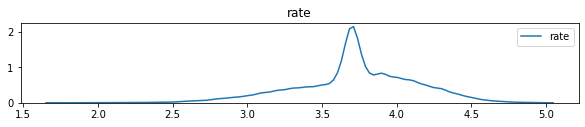

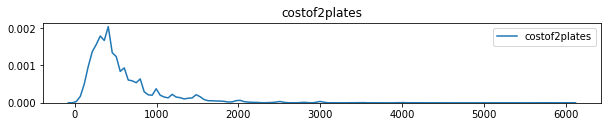

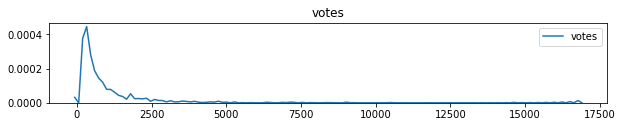

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
sns.kdeplot(num['rate'])
plt.title('rate')

plt.figure(figsize=(10,5))
plt.subplot(3,1,2)
sns.kdeplot(num['costof2plates'])
plt.title('costof2plates')

plt.figure(figsize=(10,5))
plt.subplot(3,1,3)
sns.kdeplot(num['votes'])
plt.title('votes')

In [19]:
num['costof2plates'].skew()

2.571356826399897

In [22]:
print('mean value of costof2plates', new_num['costof2plates'].mean())
print('max value of costof2plates', new_num['costof2plates'].max())
print('min value of costof2plates', new_num['costof2plates'].min())
print('std value of costof2plates', new_num['costof2plates'].std())

mean value of costof2plates 579.4807113196183
max value of costof2plates 6000.0
min value of costof2plates 40.0
std value of costof2plates 453.0266522248941


In [23]:
# calulate IQR 

p_25 = new_num['costof2plates'].quantile(0.25)
p_75 = new_num['costof2plates'].quantile(0.75)
IQR = p_75 - p_25

print(IQR)

400.0


In [24]:
upper_limit = p_75 - (1.5*IQR)
lower_limit = p_25 + (1.5*IQR)

In [25]:
new_num[new_num['costof2plates'] > upper_limit].shape

(31018, 3)

In [26]:
new_num[new_num['costof2plates'] < lower_limit].shape

(26364, 3)

In [27]:
new_num['costof2plates'] = np.where(new_num['costof2plates'] > upper_limit, upper_limit, 
                                   np.where(new_num['costof2plates'] < lower_limit, lower_limit, new_num['costof2plates']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'costof2plates')

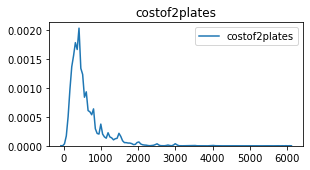

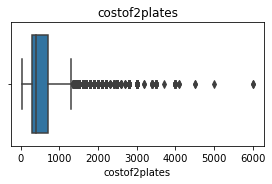

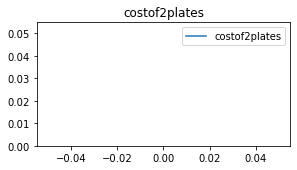

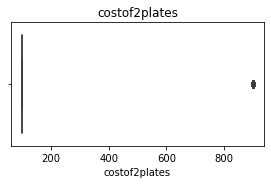

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(num['costof2plates'])
plt.title('costof2plates')

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
sns.boxplot(num['costof2plates'])
plt.title('costof2plates')

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
sns.kdeplot(new_num['costof2plates'])
plt.title('costof2plates')

plt.figure(figsize=(10,5))
plt.subplot(2,2,4)
sns.boxplot(new_num['costof2plates'])
plt.title('costof2plates')

In [29]:
new_num_1 = num.copy()

In [30]:


# Step 1: Calculate the lower and upper thresholds
lower_threshold = new_num_1['costof2plates'].quantile(0.05)
upper_threshold = new_num_1['costof2plates'].quantile(0.95)

# Step 2: Identify outliers
outliers_lower = new_num_1['costof2plates'] < lower_threshold
outliers_upper = new_num_1['costof2plates'] > upper_threshold

# Step 3: Replace outliers
new_num_1.loc[outliers_lower, 'costof2plates'] = lower_threshold
new_num_1.loc[outliers_upper, 'costof2plates'] = upper_threshold

Text(0.5, 1.0, 'costof2plates')

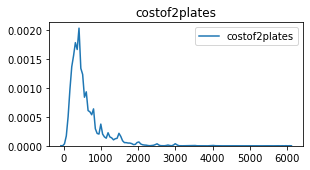

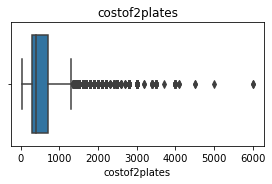

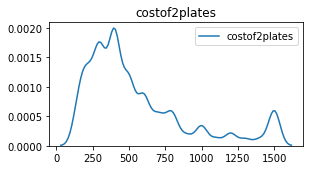

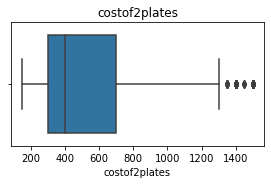

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(num['costof2plates'])
plt.title('costof2plates')

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
sns.boxplot(num['costof2plates'])
plt.title('costof2plates')

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
sns.kdeplot(new_num_1['costof2plates'])
plt.title('costof2plates')

plt.figure(figsize=(10,5))
plt.subplot(2,2,4)
sns.boxplot(new_num_1['costof2plates'])
plt.title('costof2plates')

In [32]:
# handling outliers in rate column

In [33]:

# Step 1: Calculate the lower and upper thresholds
lower_threshold = new_num_1['rate'].quantile(0.05)
upper_threshold = new_num_1['rate'].quantile(0.95)

# Step 2: Identify outliers
outliers_lower = new_num_1['rate'] < lower_threshold
outliers_upper = new_num_1['rate'] > upper_threshold

# Step 3: Replace outliers
new_num_1.loc[outliers_lower, 'rate'] = lower_threshold
new_num_1.loc[outliers_upper, 'rate'] = upper_threshold

Text(0.5, 1.0, 'rate')

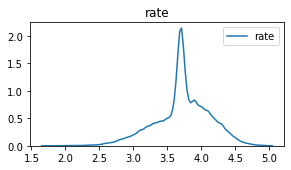

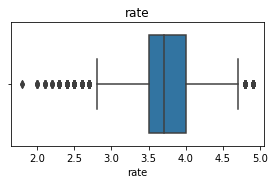

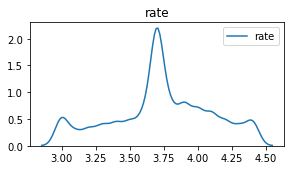

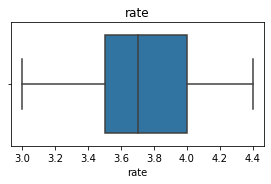

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(num['rate'])
plt.title('rate')

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
sns.boxplot(num['rate'])
plt.title('rate')

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
sns.kdeplot(new_num_1['rate'])
plt.title('rate')

plt.figure(figsize=(10,5))
plt.subplot(2,2,4)
sns.boxplot(new_num_1['rate'])
plt.title('rate')

In [35]:
# handling outliers in votes

In [36]:
# Step 1: Calculate the lower and upper thresholds
lower_threshold = new_num_1['votes'].quantile(0.05)
upper_threshold = new_num_1['votes'].quantile(0.95)

# Step 2: Identify outliers
outliers_lower = new_num_1['votes'] < lower_threshold
outliers_upper = new_num_1['votes'] > upper_threshold

# Step 3: Replace outliers
new_num_1.loc[outliers_lower, 'votes'] = lower_threshold
new_num_1.loc[outliers_upper, 'votes'] = upper_threshold

Text(0.5, 1.0, 'votes')

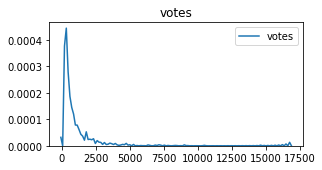

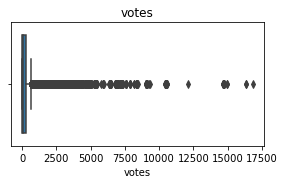

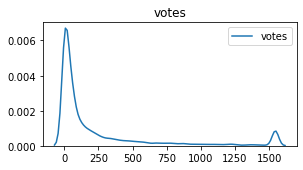

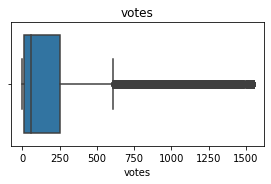

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(num['votes'])
plt.title('votes')

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
sns.boxplot(num['votes'])
plt.title('votes')

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
sns.kdeplot(new_num_1['votes'])
plt.title('votes')

plt.figure(figsize=(10,5))
plt.subplot(2,2,4)
sns.boxplot(new_num_1['votes'])
plt.title('votes')